In [1]:
import theano
import numpy as np
import time
import skimage.io

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
np.set_printoptions(precision=5, suppress=True)

import sys
sys.path.insert(0, '/home/flipvanrijn/Workspace/Dedicon-Thesis/')

# Settings
EMBEDDING_SIZE = 1000
#CLASSES = ('__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
CLASSES = ('__background__', 'accordion', 'airplane', 'ant', 'antelope', 'apple', 'armadillo', 'artichoke', 'axe', 'baby bed', 'backpack', 'bagel', 'balance beam', 'banana', 'band aid', 'banjo', 'baseball', 'basketball', 'bathing cap', 'beaker', 'bear', 'bee', 'bell pepper', 'bench', 'bicycle', 'binder', 'bird', 'bookshelf', 'bow tie', 'bow', 'bowl', 'brassiere', 'burrito', 'bus', 'butterfly', 'camel', 'can opener', 'car', 'cart', 'cattle', 'cello', 'centipede', 'chain saw', 'chair', 'chime', 'cocktail shaker', 'coffee maker', 'computer keyboard', 'computer mouse', 'corkscrew', 'cream', 'croquet ball', 'crutch', 'cucumber', 'cup or mug', 'diaper', 'digital clock', 'dishwasher', 'dog', 'domestic cat', 'dragonfly', 'drum', 'dumbbell', 'electric fan', 'elephant', 'face powder', 'fig', 'filing cabinet', 'flower pot', 'flute', 'fox', 'french horn', 'frog', 'frying pan', 'giant panda', 'goldfish', 'golf ball', 'golfcart', 'guacamole', 'guitar', 'hair dryer', 'hair spray', 'hamburger', 'hammer', 'hamster', 'harmonica', 'harp', 'hat with a wide brim', 'head cabbage', 'helmet', 'hippopotamus', 'horizontal bar', 'horse', 'hotdog', 'iPod', 'isopod', 'jellyfish', 'koala bear', 'ladle', 'ladybug', 'lamp', 'laptop', 'lemon', 'lion', 'lipstick', 'lizard', 'lobster', 'maillot', 'maraca', 'microphone', 'microwave', 'milk can', 'miniskirt', 'monkey', 'motorcycle', 'mushroom', 'nail', 'neck brace', 'oboe', 'orange', 'otter', 'pencil box', 'pencil sharpener', 'perfume', 'person', 'piano', 'pineapple', 'ping-pong ball', 'pitcher', 'pizza', 'plastic bag', 'plate rack', 'pomegranate', 'popsicle', 'porcupine', 'power drill', 'pretzel', 'printer', 'puck', 'punching bag', 'purse', 'rabbit', 'racket', 'ray', 'red panda', 'refrigerator', 'remote control', 'rubber eraser', 'rugby ball', 'ruler', 'salt or pepper shaker', 'saxophone', 'scorpion', 'screwdriver', 'seal', 'sheep', 'ski', 'skunk', 'snail', 'snake', 'snowmobile', 'snowplow', 'soap dispenser', 'soccer ball', 'sofa', 'spatula', 'squirrel', 'starfish', 'stethoscope', 'stove', 'strainer', 'strawberry', 'stretcher', 'sunglasses', 'swimming trunks', 'swine', 'syringe', 'table', 'tape player', 'tennis ball', 'tick', 'tie', 'tiger', 'toaster', 'traffic light', 'train', 'trombone', 'trumpet', 'turtle', 'tv or monitor', 'unicycle', 'vacuum', 'violin', 'volleyball', 'waffle iron', 'washer', 'water bottle', 'watercraft', 'whale', 'wine bottle', 'zebra')

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: Quadro K2200


In [2]:
%%time
from networks.keras.vocab import Vocab

vocab = Vocab('/home/flipvanrijn/Workspace/Dedicon-Thesis/downloads/coco_train_dataset.json')
print 'Vocabulary loaded'
sent_matrix = vocab.get_matrix()

Vocabulary loaded
CPU times: user 6.24 s, sys: 256 ms, total: 6.49 s
Wall time: 6.45 s


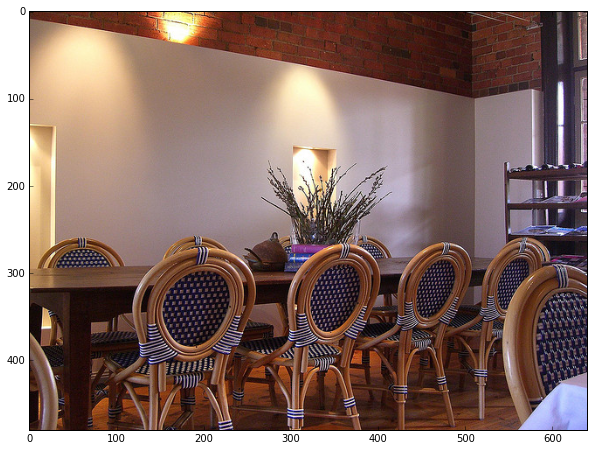

In [3]:
img = None

def showimg(img_idx):
    global img # Modify after each update
    
    img = vocab.images[img_idx]
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.imshow(skimage.io.imread('/media/Data/flipvanrijn/datasets/coco/images/train/{}'.format(img)))
from IPython.html.widgets import IntSlider, interactive
from IPython.display import display
image_slider = IntSlider(min=0, max=len(vocab.images) - 1, value=0, step=1)
image_widget = interactive(showimg, img_idx=image_slider)
display(image_widget)

# interesting: 3796 / 3012, 30982, 49290, 

###Preprocessing###

 * __selective_search.py__ generates 2000+ bounding boxes based on colour and texture
 * __frcnn.py__ selects the N (19) best regions from the selective search set

###Experimenting with embedding image regions###

%%time
%%capture
!python2.7 /home/flipvanrijn/Workspace/Dedicon-Thesis/selective_search.py --image=/media/Data/flipvanrijn/datasets/coco/images/train/$img
!python2.7 /home/flipvanrijn/Workspace/Dedicon-Thesis/frcnn.py -i /media/Data/flipvanrijn/datasets/coco/images/train/$img -o=/home/flipvanrijn/Workspace/Dedicon-Thesis/output/`echo $img`.mat

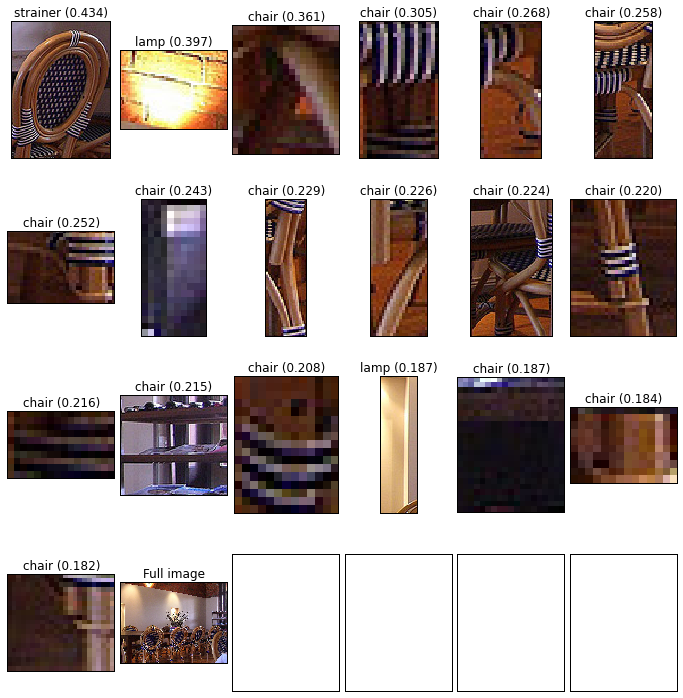

In [4]:
# Load image
import hdf5storage
image_data = hdf5storage.read(path='/', filename='/home/flipvanrijn/Workspace/Dedicon-Thesis/output/{}.mat'.format(img))
image_feats     = image_data[0][0][0][0].astype(np.float32) # 4096 features from CNN
image_fragments = image_data[0][0][0][1]                    # regions in image
image_classes   = image_data[0][0][0][2]                    # classes in image
image_scores    = image_data[0][0][0][3]                    # scores in image

# Lets visualize
fig_r, axes_r = plt.subplots(4, 6, figsize=(12, 12), subplot_kw={'xticks': [], 'yticks': []})
fig_r.subplots_adjust(hspace=0.3, wspace=0.05)
for ax, roi, cls, score in zip(axes_r.flat, image_fragments, image_classes, image_scores):
    ax.imshow(roi, interpolation='nearest', aspect='equal')
    ax.set_title('{} ({:.3f})'.format(CLASSES[int(cls)], score) if cls != -1 else 'Full image')

###No training: v<sub>i</sub>*s<sub>t</sub>###

###Combined in one model###

In [1]:
import sys
import theano
sys.path.insert(0, '/home/flipvanrijn/Workspace/Dedicon-Thesis/')

from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import Bidirectional, SimpleRNN
from keras.layers import containers
from networks.keras.score import Score # Custom merge layer
from networks.keras.unsupervised import Unsupervised
from networks.keras.customloss import rank_loss

# Image model
image_model = Sequential()
image_model.add(Dense(4096, 1000, init='uniform'))

# Sentence mode
sent_model = Sequential()
sent_model.add(Bidirectional(SimpleRNN, 8856, 1000, return_sequences=True, activation='relu'))

# Combined model
combined_model = Unsupervised()
combined_model.add(Score([image_model, sent_model]))
combined_model.compile(optimizer='sgd', loss=rank_loss)
#f_combined = theano.function([image_model.get_input(), sent_model.get_input()], combined_model.get_output())

Using gpu device 0: Quadro K2200
/usr/local/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:133: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import theano
import numpy as np
f_sent = theano.function([sent_model.get_input()], sent_model.get_output())
#f_sent(np.zeros((1,9,8856), dtype=np.float32)).shape
f_img = theano.function([image_model.get_input()], image_model.get_output())
f_img([np.zeros((20, 4096), dtype=np.float32)])
#f_combined(np.zeros((20,4096), dtype=np.float32), np.zeros((1,9,8856), dtype=np.float32)).shape
#f_sent(np.zeros((3, 9, 8856), dtype=np.float32)).shape

TypeError: ('Bad input argument to theano function with name "<ipython-input-5-17c94eb35f25>:5"  at index 0(0-based)', 'Wrong number of dimensions: expected 2, got 3 with shape (1, 20, 4096).')

In [5]:
%%time
import numpy as np
d_img = np.zeros((500*20, 4096))
d_sent = np.ones((500, 9, 8856))
#combined_model._train(d_img, d_sent, np.array([[1,2], [3,4]]))
print combined_model._predict(d_img, d_sent, np.zeros((2,2))).shape

#combined_model.fit([d_img, d_sent], [np.array([[1,2], [3,4]], dtype=np.float32)])

(500, 1, 9)
CPU times: user 508 ms, sys: 229 ms, total: 737 ms
Wall time: 736 ms


In [18]:
%%time
#d_images = [image_feats]*5
#d_sentences = []
#for sent_idx in vocab.img_to_sent[image_slider.value]:
#    sentence = vocab.sentences[sent_idx]
#    sentence_1h = np.array(vocab.sentence_to_1h(sentence))
#    sentence_1h = sentence_1h[:, np.newaxis, :]
#    d_sentences.append(sentence_1h)
    
#import itertools
#d_scores = np.zeros([5, 5, 2], dtype=np.float32)
#for k, l in [x for x in itertools.product(xrange(len(d_images)), xrange(len(d_sentences)))]:
#    d_scores[k,l] = f_combined(d_images[k], d_sentences[l])

    
scores   = np.array([[1,2], [3,4]])
#scores   = np.array([[4, 1], [2, 3]])
scores_T = np.transpose(scores)
cost = 0
d_img_idxs = range(2)
for k in d_img_idxs:
    rank_imgs = rank_sents = 0
    for l in [x for x in d_img_idxs if x != k]:
        S_kl, S_kk = scores[k,l], scores[k,k]
        rank_imgs += max(0, S_kl - S_kk + 1)
    for l in [x for x in d_img_idxs if x != k]:
        S_lk, S_kk = scores_T[k,l], scores_T[k,k]
        rank_sents += max(0, S_lk - S_kk + 1)
    cost += rank_imgs + rank_sents
print cost

5
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 97 µs


In [24]:

import theano.tensor as T

scores = T.matrix('scores')
cost = T.dscalar('cost')
num_imgs = scores.shape[0]
num_imgs.name = 'num_imgs'

def img_loop(k, num_imgs, scores):
    inner_loop_idxs = T.neq(T.arange(scores.shape[0]), k).nonzero()[0]
    
    results_imgs, _ = theano.scan(
        fn=lambda l, scores: T.maximum(0, scores[k,l] - scores[k,k] + 1),
        sequences=[inner_loop_idxs],
        non_sequences=[scores]
    )
    results_sents, _ = theano.scan(
        fn=lambda l, scores: T.maximum(0, scores[k,l] - scores[k,k] + 1),
        sequences=[inner_loop_idxs],
        non_sequences=[scores.T]
    )
    results_imgs = T.sum(results_imgs)
    results_sents = T.sum(results_sents)
    
    return results_imgs + results_sents

results, _ = theano.scan(
    fn=img_loop,
    outputs_info=None,
    sequences=[T.arange(scores.shape[0])], 
    non_sequences=[num_imgs, scores],
    strict=True
)
cost = T.sum(results)
loss = theano.function([scores], outputs=cost)
#print theano.pp(loss.maker.fgraph.outputs[0])


In [ ]:
# Load a sentence
sentence = None
sentence_1h = None

def showsent(sent_idx):
    global sentence
    global sentence_1h
    
    sentence = vocab.sentences[vocab.img_to_sent[image_slider.value][sent_idx]]
    sentence_1h = np.array(vocab.sentence_to_1h(sentence))
    sentence_1h = sentence_1h[:, np.newaxis, :]
    
    print sentence
    #print sentence_1h
    
    max_scores, idx_fragment = f_combined(image_feats, sentence_1h)
    print 'Score image-to-sentence: {}'.format(np.sum(max_scores))

    # Plot the images with their words
    fig_fragments, ax_fragments = plt.subplots(1, len(idx_fragment))
    fig_fragments.set_size_inches(15, 2)
    for i, idx in enumerate(idx_fragment):
        ax_fragments[i].imshow(np.array(image_fragments[idx][0]))
        ax_fragments[i].yaxis.set_visible(False)
        ax_fragments[i].set_title(sentence[i])
        ax_fragments[i].set_xticklabels([])
        ax_fragments[i].set_xlabel(max_scores[i][0])
        
sent_slider = IntSlider(min=0, max=4, value=0, step=1) # 5 sentences per image
sent_widget = interactive(showsent, sent_idx=sent_slider)
display(sent_widget)